In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
plt.style.use('ggplot')
%matplotlib inline
from plotnine import*

In [92]:
from matplotlib import font_manager,rc
font_n = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_n)

In [93]:
shop = pd.read_csv("C:/Users/Lee Jong Ann/Downloads/Untitled Folder 1/csv데이터/소상공인시장진흥공단_상가업소정보_201806_01.csv",encoding='cp949')

In [94]:
shop.shape

(476183, 39)

In [95]:
shop.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [96]:
shop['시도명'].value_counts()

서울특별시    330089
부산광역시    146094
Name: 시도명, dtype: int64

In [97]:
shop_seoul = shop.loc[shop['시도명'] == '서울특별시']
shop_busan = shop.loc[shop['시도명'] == '부산광역시']

In [98]:
shop_seoul['상권업종대분류명'].value_counts()

음식          109766
소매          101297
생활서비스        52728
학문/교육        26294
의료           15144
부동산          12905
관광/여가/오락      9165
숙박            2744
스포츠             46
Name: 상권업종대분류명, dtype: int64

서울시와 부산시에서는 소매와 음식과 관련된 점포수가 압도적으로 많다
그리고 서울시와 부산시의 업종별 점포수가 거의 2배씩 차이 나는것을 알 수 있다. 


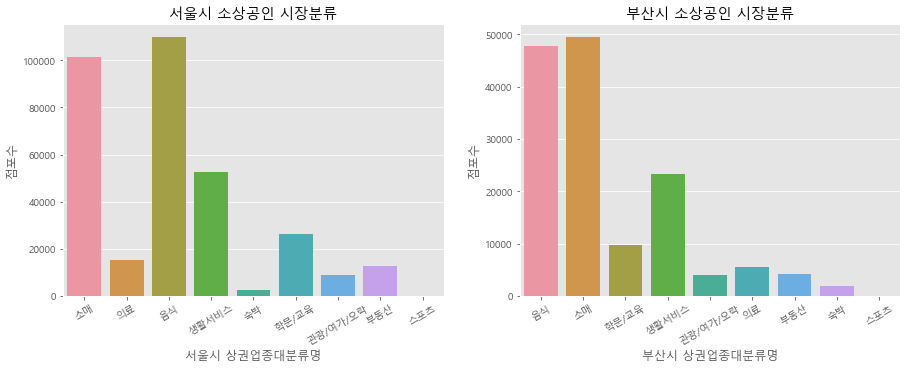

In [99]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
plt.sca(ax1)
sns.countplot(data=shop_seoul,x='상권업종대분류명',ax=ax1)
plt.title("서울시 소상공인 시장분류")
plt.ylabel("점포수")
plt.xlabel("서울시 상권업종대분류명")
plt.xticks(rotation=30)

plt.sca(ax2)
sns.countplot(data=shop_busan,x='상권업종대분류명',ax=ax2)
plt.ylabel("점포수")
plt.xlabel("부산시 상권업종대분류명")
plt.title("부산시 소상공인 시장분류")
plt.xticks(rotation=30)

print("서울시와 부산시에서는 소매와 음식과 관련된 점포수가 압도적으로 많다")
print("그리고 서울시와 부산시의 업종별 점포수가 거의 2배씩 차이 나는것을 알 수 있다. ")

In [100]:
shop_seoul_meal=shop_seoul.loc[shop_seoul['상권업종대분류명'] == '음식'] 
shop_seoul_somae=shop_seoul.loc[shop_seoul['상권업종대분류명'] == '소매'] 

서울 시내에 있는 소매점은 의복 의류와 종합 소매점이 가장 많은 것을 확인할 수 있다.


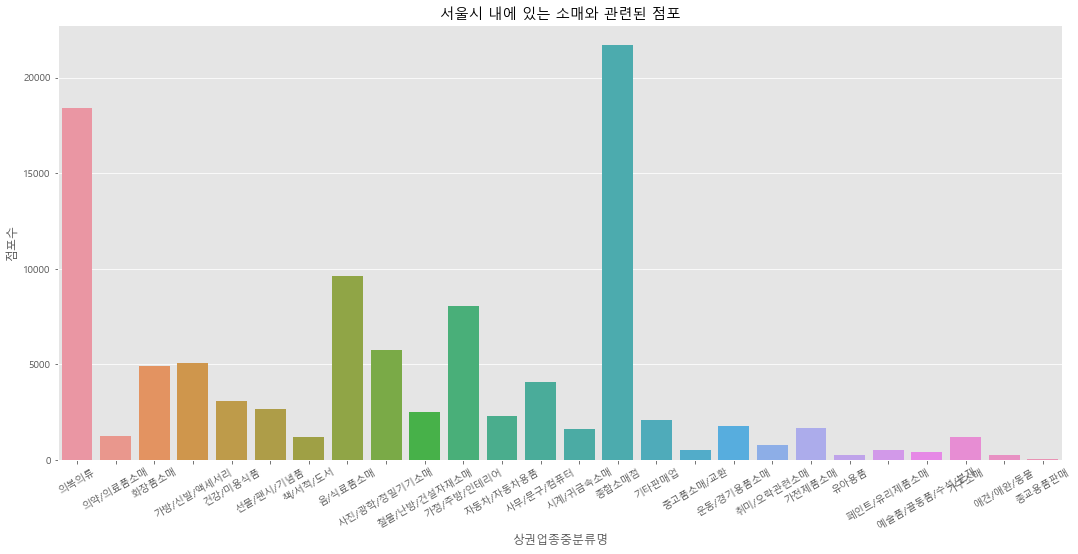

In [101]:
fig,axis1=plt.subplots()
fig.set_size_inches(18,8)

sns.countplot(data=shop_seoul_somae,x='상권업종중분류명',ax=axis1)
plt.xticks(rotation=30)
plt.title("서울시 내에 있는 소매와 관련된 점포")
plt.ylabel("점포수")
print("서울 시내에 있는 소매점은 의복 의류와 종합 소매점이 가장 많은 것을 확인할 수 있다.")

In [102]:
clothes = shop_seoul_somae.loc[shop_seoul_somae['상권업종중분류명'] == '의복의류']
Convenience_seoul = shop_seoul_somae.loc[shop_seoul_somae['상권업종중분류명'] == '종합소매점']

clothes['상권업종소분류명'].value_counts()

일반의류           9451
여성의류전문점        2023
캐쥬얼/스포츠의류      1590
셔츠/내의/속옷        911
섬유/직물/주단        848
아동복판매           847
남성의류전문점         761
한복/갈옷/민속옷       507
맞춤양장/양장점        490
맞춤양복/양복점        238
여성내의전문점         209
가죽/모피의류         158
예복/웨딩드레스        130
유니폼/맞춤복/단체복      98
교복판매             93
특수복판매            39
청바지판매            12
법복(승복)판매          5
Name: 상권업종소분류명, dtype: int64

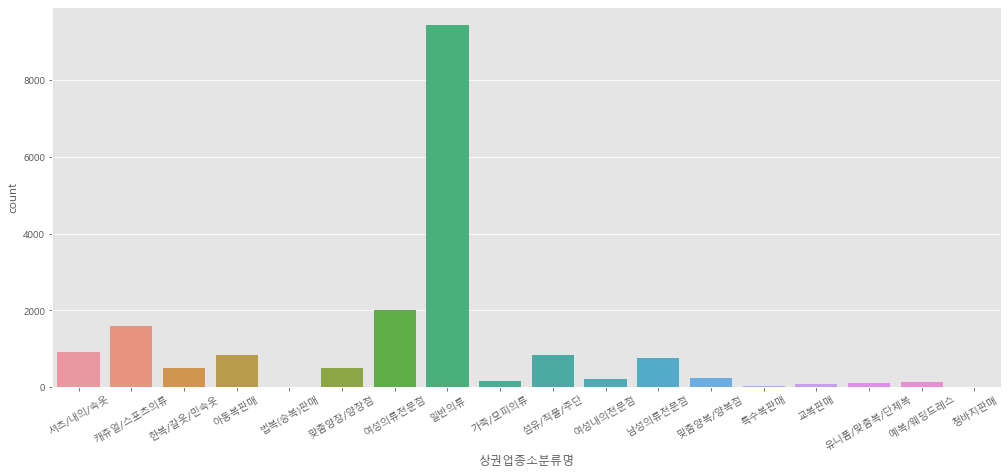

In [103]:
fig,axis2 = plt.subplots()
fig.set_size_inches(17,7)

plt.xticks(rotation=30)
sns.countplot(data=clothes,x='상권업종소분류명',ax=axis2)

In [104]:
clothes_foreign = clothes.loc[clothes['상호명'].str.contains("유니클로|데상트")]

In [105]:
clothes_foreign['상호명'].value_counts()

유니클로              17
데상트               15
유니클로은평점            2
데상트스포츠             1
데상트골프              1
유니클로YZPARK홍대점      1
유니클로신림포도몰점         1
데상트신세계백화점본점        1
유니클로용산아이파크몰점       1
데상트아이파크            1
유니클로광화문디타워점        1
데상트IFC몰직영점         1
유니클로상봉점            1
유니클로테크노마트강변점       1
데상트현대백화점무역         1
유니클로롯데백화점청량리점      1
유니클로롯데영플라자점        1
유니클로종로3가점종로3가점     1
데상트현대백화점신촌         1
데상트롯데백화점영등포        1
데상트강변엔터식스점         1
유니클로명동중앙점          1
데상트현대디큐브시티점        1
데상트현대백화점본점         1
유니클로롯데마트중계점        1
데상트수유점             1
제이에스리테일데상트         1
유니클로목동현대백화점        1
유니클로잠실롯데월드점        1
데상트아이파크용산점         1
유니클로강남점            1
데상트코리아             1
유니클로롯데백화점영등포점      1
유니클로압구정점           1
유니클로이마트양재점         1
유니클로파스텔시티사당점       1
데상트롯데백화점미아         1
유니클로장안바우하우스점       1
Name: 상호명, dtype: int64

In [109]:
print(clothes['상호명'].value_counts())
print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
Convenience_seoul['상호명'].value_counts()

BYC      71
트라이      34
비비안      29
아디다스     26
크로커다일    26
         ..
코디하우스     1
아벨컴퍼니     1
안나구제      1
패션짱       1
영하이패션     1
Name: 상호명, Length: 13823, dtype: int64
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ


CU          1445
GS25        1326
세븐일레븐        855
미니스톱         189
이마트          132
            ... 
맥스             1
ACCUDIGM       1
찌민이스토리         1
누이제이           1
디딤발            1
Name: 상호명, Length: 14428, dtype: int64

In [43]:
Convenience_seoul['상호명'].unique()

array(['개전리구판장', '양평슈퍼', '주영상회', ..., '해성무역상사', '셀프염색편의점', '남서부Fresh유통'],
      dtype=object)

In [81]:
Convenience_seoul_best4['브랜드명'] = ''

C:\Users\Lee Jong Ann\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
Convenience_seoul_best4[['상호명','브랜드명']].head()

,상호명,브랜드명
765,세븐일레븐대치코스모스점B,
945,GS25,
1025,GS25안암학사,
1649,세븐일레븐,
1887,세븐일레븐,


In [87]:
Convenience_seoul_best4 = Convenience_seoul.loc[Convenience_seoul['상호명'].str.contains("세븐일레븐|미니스톱|CU|GS25")]

In [88]:
Convenience_seoul_best4.loc[Convenience_seoul_best4['상호명'].str.contains('세븐일레븐'),'브랜드명'] = '세븐일레븐'
Convenience_seoul_best4.loc[Convenience_seoul_best4['상호명'].str.contains('미니스톱'),'브랜드명'] = '미니스톱'
Convenience_seoul_best4.loc[Convenience_seoul_best4['상호명'].str.contains('CU'),'브랜드명'] = 'CU'
Convenience_seoul_best4.loc[Convenience_seoul_best4['상호명'].str.contains('GS25'),'브랜드명'] = 'GS25'

In [89]:
Convenience_seoul_best4['브랜드명'].value_counts()

GS25     2539
CU       2100
세븐일레븐    1462
미니스톱      318
Name: 브랜드명, dtype: int64

In [108]:
Convenience_seoul_best4.tail(20)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,브랜드명
473807,16139927,CU,삼성경기고점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,삼예빌딩,서울특별시 강남구 학동로 520,135870,6085.0,NaN,7,NaN,127.055761,37.519560,CU
473809,16139984,GS25,길동베네치아점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,서한베네치아아파트,서울특별시 강동구 명일로 201,134809,5350.0,NaN,NaN,NaN,127.145589,37.536896,GS25
473812,16140730,세븐일레븐,여의도메리어트호텔점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,여의도파크센터,서울특별시 영등포구 여의대로 8,150881,7320.0,NaN,NaN,NaN,126.918562,37.521204,세븐일레븐
473998,16141007,미니스톱,고대사이언스점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,NaN,서울특별시 성북구 인촌로22길 6-3,136713,2855.0,NaN,NaN,NaN,127.028542,37.585927,미니스톱
474021,16140473,세븐일레븐,신월시장점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,NaN,서울특별시 양천구 남부순환로40길 49,158829,7912.0,NaN,NaN,NaN,126.826907,37.533484,세븐일레븐
474023,16140513,세븐일레븐,대치승리점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,송암빌딩,서울특별시 강남구 삼성로82길 4,135847,6185.0,NaN,6,NaN,127.058141,37.504829,세븐일레븐
474034,16140687,세븐일레븐,북가좌거북점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,블리스빌,서울특별시 서대문구 거북골로22길 13,120814,3680.0,NaN,NaN,NaN,126.908505,37.579454,세븐일레븐
474040,16139157,CU,중랑동일점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,아주슈퍼,서울특별시 중랑구 동일로152길 18,131849,2045.0,NaN,NaN,NaN,127.079318,37.608419,CU
474204,16096409,GS25,신당래미안점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,래미안신당하이베르아파트,서울특별시 중구 퇴계로90길 74,100455,4582.0,NaN,1,202,127.020965,37.560996,GS25
474259,16131329,세븐일레븐,신길행촌주유소점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,NaN,서울특별시 영등포구 도신로 130,150847,7384.0,NaN,NaN,NaN,126.905965,37.508483,세븐일레븐


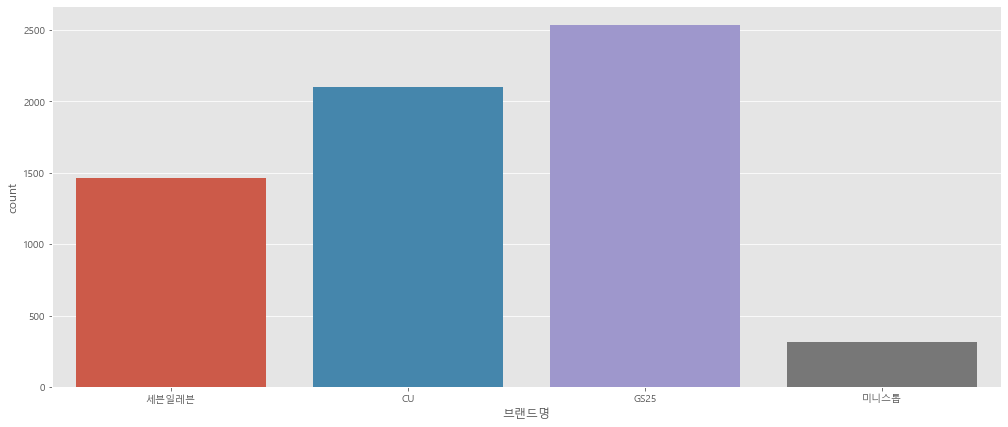

In [90]:
fig,axis5=plt.subplots()
fig.set_size_inches(17,7)

sns.countplot(data=Convenience_seoul_best4,x='브랜드명',ax=axis5)

In [112]:
m2 = folium.Map(location=[Convenience_seoul_best4['위도'].mean(),Convenience_seoul_best4['경도'].mean()],zoom_start=12)

for i in Convenience_seoul_best4.index[:1000]:
   
    sub_lat=Convenience_seoul_best4.loc[i,'위도'] 
    sub_long=Convenience_seoul_best4.loc[i,'경도']
    title=Convenience_seoul_best4.loc[i,'브랜드명'] + "-" + Convenience_seoul_best4.loc[i,'도로명주소']
    folium.Marker([sub_lat,sub_long],popup=title).add_to(m2)
m2

서울시 내에서는 한식과 관련된 업종이 압도적으로 많다는 것을 확인할 수 있다. 대략 35만개


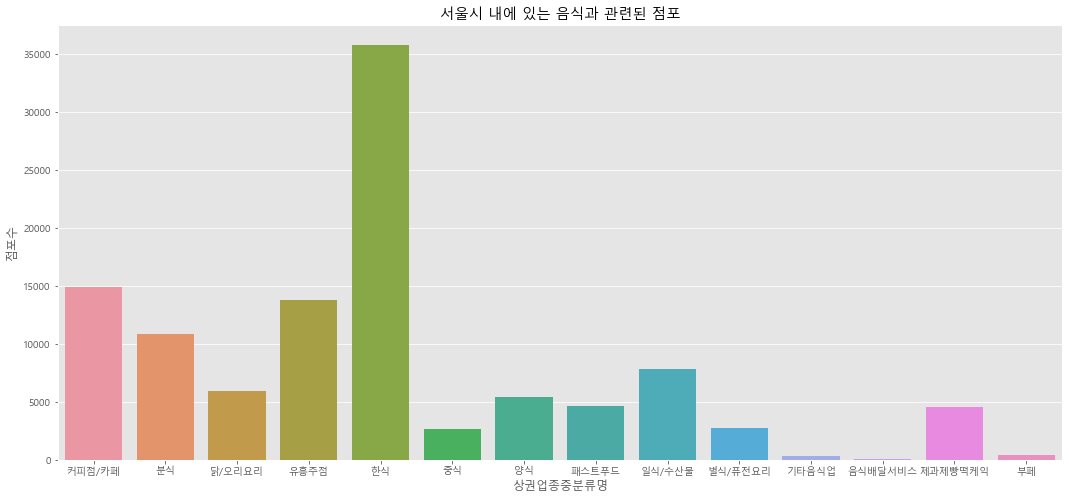

In [15]:
fig,ax3=plt.subplots()
fig.set_size_inches(18,8)

sns.countplot(data=shop_seoul_meal,x='상권업종중분류명',ax=ax3)
plt.title("서울시 내에 있는 음식과 관련된 점포")
plt.ylabel("점포수")
print("서울시 내에서는 한식과 관련된 업종이 압도적으로 많다는 것을 확인할 수 있다. 대략 35만개")

In [16]:
shop_seoul_meal_hansik = shop_seoul_meal.loc[shop_seoul_meal['상권업종중분류명'] == '한식']
shop_seoul_meal_hansik.shape

(35778, 39)

In [17]:
shop_seoul_meal_hansik['상권업종소분류명'].value_counts()

한식/백반/한정식    23721
갈비/삼겹살        4125
족발/보쌈전문       1628
해장국/감자탕       1366
곱창/양구이전문      1261
부대찌개/섞어찌개      751
냉면집            637
설렁탕집           529
추어탕전문          372
기타고기요리         366
파전전문           211
보리밥전문          164
쌈밥전문           117
순두부전문          107
두부요리전문         105
한정식전문          100
기사식당            92
돌솥/비빕밥전문점       60
황태전문            58
버섯전문점            6
재첩국전문            2
Name: 상권업종소분류명, dtype: int64

In [18]:
shop_seoul_meal_hansik['상호명'].value_counts()

전주식당          120
남원추어탕          88
호남식당           50
하남돼지집          43
가장맛있는족발        42
             ... 
돈우랑             1
식객촌             1
놀부보쌈광화문LG점      1
돈천동식당           1
달파란             1
Name: 상호명, Length: 27239, dtype: int64

In [19]:
shop_seoul_meal_hansik_best2 = shop_seoul_meal_hansik.loc[shop_seoul_meal_hansik['상호명'].str.contains('전주식당|남원추어탕')].copy()

In [20]:
m1 = folium.Map(location=[shop_seoul_meal_hansik_best2['위도'].mean(),shop_seoul_meal_hansik_best2['경도'].mean()],zoom_start=12)

for i in shop_seoul_meal_hansik_best2.index:
    if shop_seoul_meal_hansik_best2['상호명'][i] == '전주식당':
        icon_color='pink'
    else:
        icon_color='blue'
    sub_lat=shop_seoul_meal_hansik_best2.loc[i,'위도'] 
    sub_long=shop_seoul_meal_hansik_best2.loc[i,'경도']
    title=shop_seoul_meal_hansik_best2.loc[i,'상호명'] + "-" + shop_seoul_meal_hansik_best2.loc[i,'도로명주소']
    folium.Marker([sub_lat,sub_long],popup=title,icon=folium.Icon(color=icon_color)).add_to(m1)
m1

In [21]:
shop_seoul_meal['상호명'].value_counts()

이디야커피              337
스타벅스               235
김밥천국               215
파리바게뜨              199
간단하지만특별한화피디Cafe    193
                  ... 
마호로바                 1
미팅닭발                 1
PIZZAALVOLO          1
안토니오                 1
더크랩하우스               1
Name: 상호명, Length: 76560, dtype: int64

In [22]:
shop_seoul_meal_best2 = shop_seoul_meal.loc[shop_seoul_meal['상호명'].str.contains('이디야커피|스타벅스')].copy()
shop_seoul_meal_best2.shape

(855, 39)

In [23]:
shop_seoul_meal_best2['브랜드명']=''

In [24]:
shop_seoul_meal_best2[['상호명','브랜드명']].head()

,상호명,브랜드명
1492,이디야커피,
1682,스타벅스종로3가점,
2419,이디야커피,
7271,이디야커피중계롯데우성점중계롯데우성점,
12008,이디야커피,


In [25]:
shop_seoul_meal_best2.loc[shop_seoul_meal_best2['상호명'].str.contains('이디야커피'),'브랜드명'] = '이디야'
shop_seoul_meal_best2.loc[shop_seoul_meal_best2['상호명'].str.contains('스타벅스'),'브랜드명'] = '스타벅스'

In [26]:
shop_seoul_meal_best2[['상호명','브랜드명']]

,상호명,브랜드명
1492,이디야커피,이디야
1682,스타벅스종로3가점,스타벅스
2419,이디야커피,이디야
7271,이디야커피중계롯데우성점중계롯데우성점,이디야
12008,이디야커피,이디야
...,...,...
470563,이디야커피,이디야
472654,스타벅스,스타벅스
472976,스타벅스,스타벅스
473703,이디야커피,이디야


In [27]:
shop_seoul_meal_best2.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도', '브랜드명'],
      dtype='object')

In [28]:
m = folium.Map(location=[shop_seoul_meal_best2['위도'].mean(),shop_seoul_meal_best2['경도'].mean()],zoom_start=12)

for i in shop_seoul_meal_best2.index[:]:
    if shop_seoul_meal_best2['브랜드명'][i] == '이디야':
        icon_color='pink'
    else:
        icon_color='blue'
    sub_lat=shop_seoul_meal_best2.loc[i,'위도'] 
    sub_long=shop_seoul_meal_best2.loc[i,'경도']
    title=shop_seoul_meal_best2.loc[i,'브랜드명'] + "-" + shop_seoul_meal_best2.loc[i,'도로명주소']
    folium.Marker([sub_lat,sub_long],popup=title,icon=folium.Icon(color=icon_color)).add_to(m)
m

In [29]:
shop_busan['상권업종대분류명'].value_counts()

소매          49443
음식          47701
생활서비스       23294
학문/교육        9819
의료           5502
부동산          4294
관광/여가/오락     3999
숙박           2012
스포츠            30
Name: 상권업종대분류명, dtype: int64

In [30]:
shop_busan_food = shop_busan.loc[shop_busan['상권업종대분류명'] == '음식']
shop_busan_food.shape

(47701, 39)

부산에서는 두번째로 점포가 많은 것이 유흥주점이다.


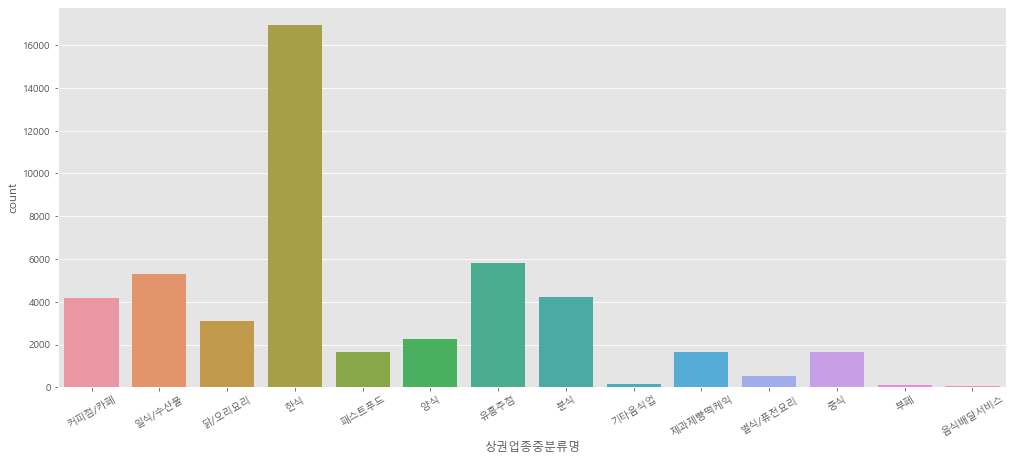

In [31]:
fig,axis3=plt.subplots()
fig.set_size_inches(17,7)
plt.xticks(rotation=30)
sns.countplot(data=shop_busan_food,x='상권업종중분류명')
print("부산에서는 두번째로 점포가 많은 것이 유흥주점이다.")

In [32]:
shop_busan_food_hansik = shop_busan_food.loc[shop_busan_food['상권업종중분류명'] =='한식']

In [33]:
shop_busan_food_Alchol = shop_busan_food.loc[shop_busan_food['상권업종중분류명'] =='유흥주점']
shop_busan_food_Alchol['상호명'].value_counts()

투다리           40
봉구비어          35
오춘자비어         35
칠공공비어         16
옛날통닭          12
              ..
본스치킨와우치킨       1
비행기노래방단란주점     1
못난이포차          1
보조개노래방         1
바울종합서비스        1
Name: 상호명, Length: 4736, dtype: int64

호프 맥주에서 가장 많이 차지하고 있는 부분은 바로 투다리와 봉구비어가 가장 많은 점포를 가지고 있다.


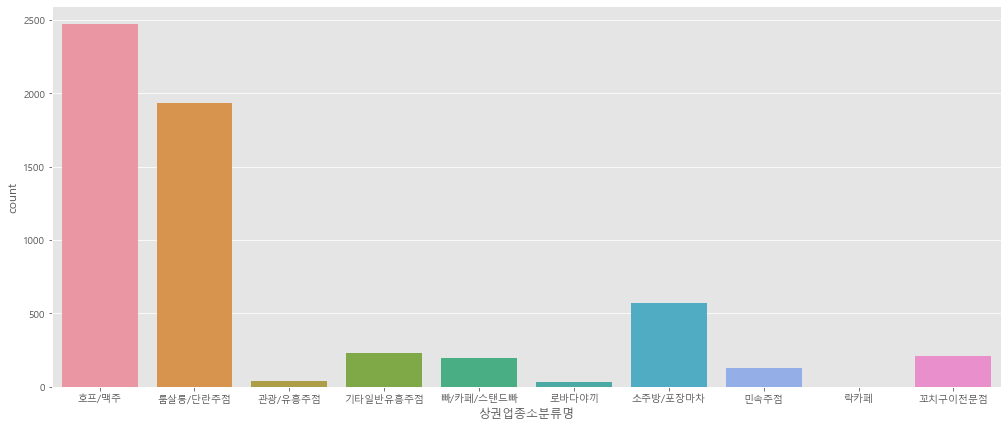

In [34]:
fig,axis5=plt.subplots()
fig.set_size_inches(17,7)

sns.countplot(data=shop_busan_food_Alchol,x='상권업종소분류명',ax=axis5)
print("호프 맥주에서 가장 많이 차지하고 있는 부분은 바로 투다리와 봉구비어가 가장 많은 점포를 가지고 있다.")

In [35]:
shop_busan_food_Alchol['상호명'].value_counts()

투다리           40
봉구비어          35
오춘자비어         35
칠공공비어         16
옛날통닭          12
              ..
본스치킨와우치킨       1
비행기노래방단란주점     1
못난이포차          1
보조개노래방         1
바울종합서비스        1
Name: 상호명, Length: 4736, dtype: int64

In [36]:
shop_busan_food_hansik_best2 = shop_busan_food_hansik.loc[shop_busan_food_hansik['상호명'].str.contains('밀양돼지국밥|삼겹파티')].copy()
shop_busan_food_hansik_best2.shape

(74, 39)

In [37]:
m2 = folium.Map(location=[shop_busan_food_hansik_best2['위도'].mean(),shop_busan_food_hansik_best2['경도'].mean()],zoom_start=12)

for i in shop_busan_food_hansik_best2.index[:]:
    if shop_busan_food_hansik_best2['상호명'][i] == '밀양돼지국밥':
        icon_color='pink'
    else:
        icon_color='blue'
    sub_lat=shop_busan_food_hansik_best2.loc[i,'위도'] 
    sub_long=shop_busan_food_hansik_best2.loc[i,'경도']
    title=shop_busan_food_hansik_best2.loc[i,'상호명'] + "-" + shop_busan_food_hansik_best2.loc[i,'도로명주소']
    folium.Marker([sub_lat,sub_long],popup=title,icon=folium.Icon(color=icon_color)).add_to(m2)
m2